DADA 3 TABLAS DE UN RESTAURANTE llegadas que contiene 2 columnas, hora de llegada y cuantas personas llegaron en esa 
llegada, la segunda tabla es platillos que contiene el nombre y costo en 2 columnas, por ultimo bebidas que es lo mismo que
platillos, pregunta la dueña que cuanto en promedio gana al dia.

primero realizas un preprocesamiento de datos es decir las horas de llegadas las conviertes a minutos y de ahi la diferencia
del que llego primero al segundo, del segundo al tercero, etc. 
posterior buscas que distribucion queda mejor, una vez eso simulas los tiempos de llegada 
para saber cuantas personas llegaron por cada llegada (atencion) verificas la frecuencia relativa y de ahi tomas conforme a la
probabilidad numeros que indiquen cuantas personas llegaron por atencion
posterior haces lo mismo con la comida y bebida, realizas suma del costo y listo 
hasta aqui simulaste un dia 
´posterior solo simulas muchos dias y promedias

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from plotnine import *

In [5]:
!pip install plotnine

In [6]:
!pip install distfit

In [7]:
from distfit import distfit

In [8]:
llegadas = pd.read_csv("C:\\Users\\VING0AK\Desktop\\AnalisisDeDatos\\Estadistica\\llegadas_restaurante.csv")
platillos = pd.read_csv("C:\\Users\\VING0AK\Desktop\\AnalisisDeDatos\\Estadistica\\platillos.csv")
bebidas = pd.read_csv("C:\\Users\\VING0AK\Desktop\\AnalisisDeDatos\\Estadistica\\bebidas.csv")


In [9]:

llegadas.head()

,Hora_Llegada,Tamaño_Grupo
0,08:10,2
1,08:21,2
2,08:28,2
3,08:56,2
4,09:04,2


In [10]:
llegadas.columns

Index(['Hora_Llegada', 'Tamaño_Grupo'], dtype='object')

In [11]:
llegadas.shape

(62, 2)

In [12]:
#para ver el tipo de objeto de una columna
llegadas["Hora_Llegada"].dtype

dtype('O')

In [13]:
#convertir objeto a horas minutos (preprocesamiento)
llegadas["hora_llegada"] = pd.to_datetime(llegadas["Hora_Llegada"],
                                          format='%H:%M')


In [14]:
# RESTA CADA VALOR DE SU ANTERIOR (es un formato de horas, minutos y de mas ) 
llegadas["hora_llegada"].diff()

0                NaT
1    0 days 00:11:00
2    0 days 00:07:00
3    0 days 00:28:00
4    0 days 00:08:00
           ...      
57   0 days 00:01:00
58   0 days 00:24:00
59   0 days 00:20:00
60   0 days 00:06:00
61   0 days 00:07:00
Name: hora_llegada, Length: 62, dtype: timedelta64[ns]

In [15]:
# Regresa en segundos 
# llegadas["espera"] = llegadas["hora_llegada"].diff().dt.total_seconds()
# dividimos entre 60 para que sean minutos 
llegadas["espera"] = llegadas["hora_llegada"].diff().dt.total_seconds()/60

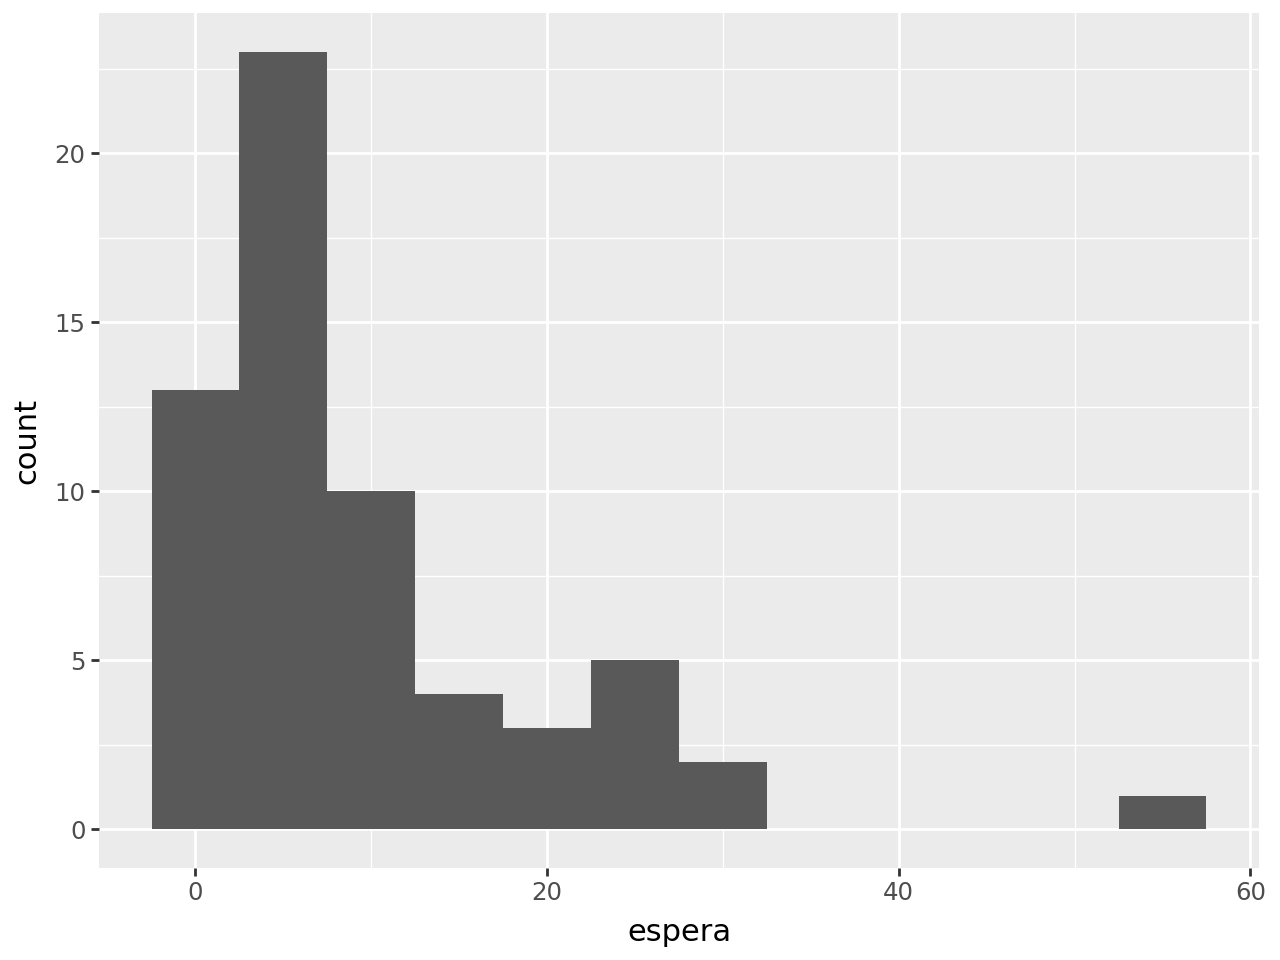

In [16]:
ggplot(data=llegadas) + geom_histogram(mapping=aes(x="espera"),binwidth=5)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 0.00373723] [loc=9.557 scale=9.722]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 0.000445613] [loc=0.000 scale=9.557]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.000455771] [loc=-557.344 scale=557.344]
[distfit] >INFO> [dweibull  ] [0.08 sec] [RSS: 0.00249125] [loc=6.000 scale=6.147]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 0.00157685] [loc=6.335 scale=4.777]
[distfit] >INFO> [genextreme] [0.07 sec] [RSS: 0.000279533] [loc=4.524 scale=4.632]
[distfit] >INFO> [gamma     ] [0.17 sec] [RSS: 0.00105706] [loc=-0.000 scale=9.814]
[distfit] >INFO> [lognorm   ] [0.06 sec] [RSS: 0.0121663] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.10 sec] [RSS: 0.000632666] [loc=-0.000 scale=430.856]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00808918] [loc=0.000 scale=55.000]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.00383806] [loc=-2910.253 scale=398.059]
[distfit] >INFO> [nor

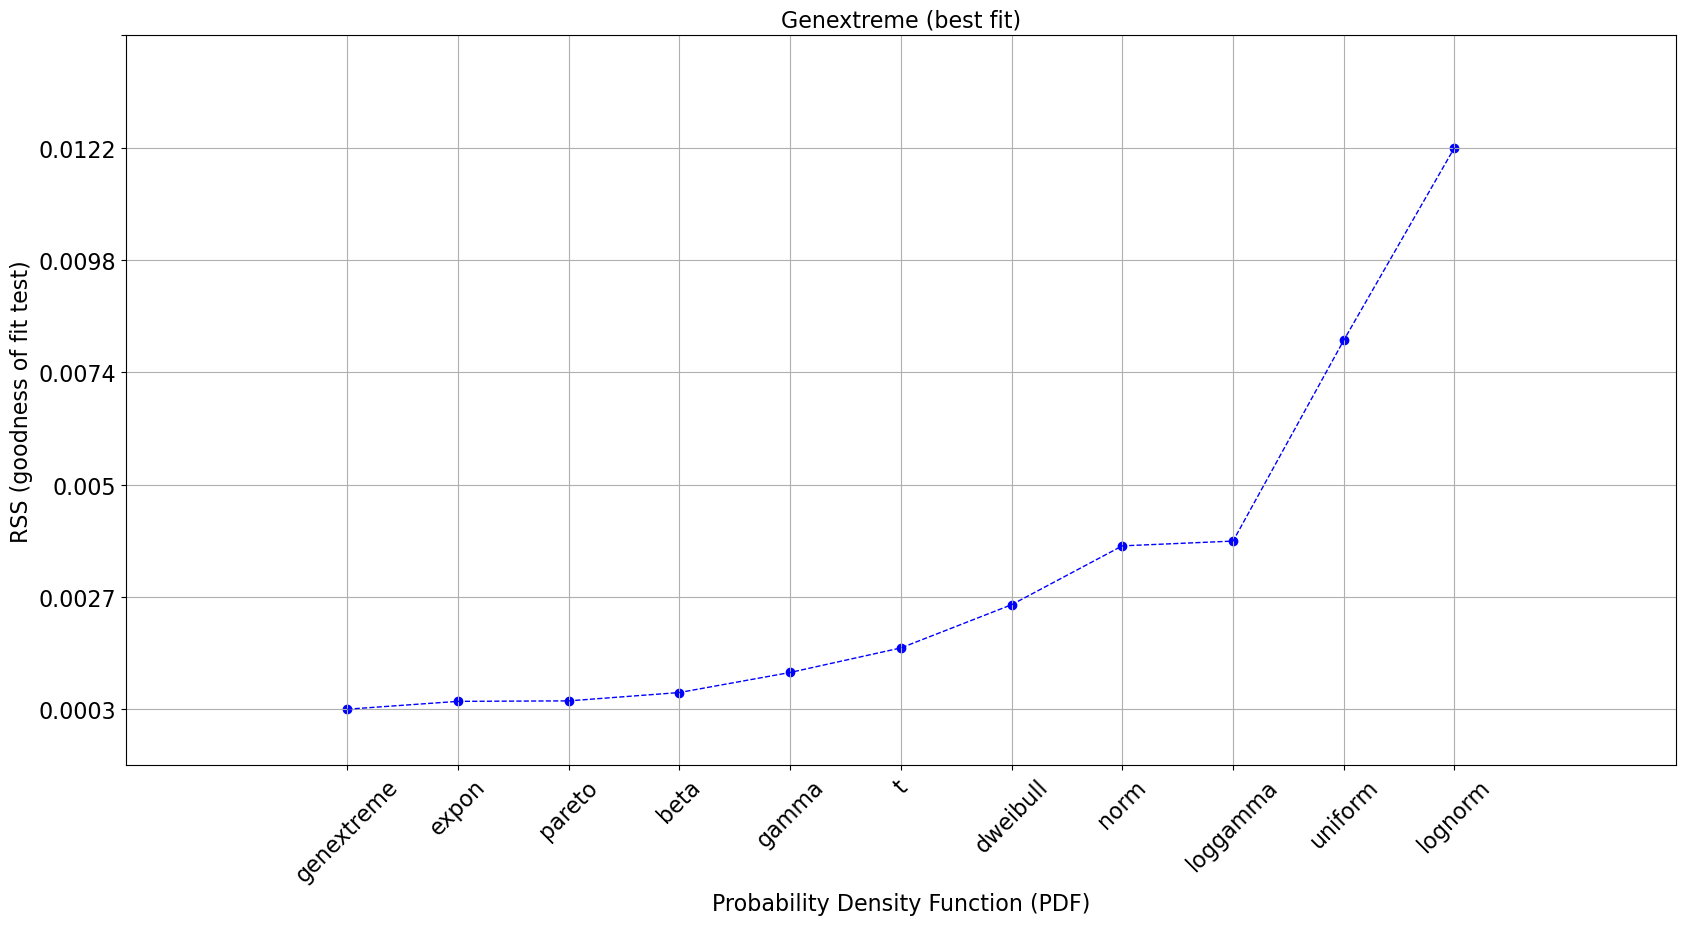

In [17]:
## Distribución de los tiempos de espera entre llegada y llegada
## al insertar llegadas["espera"] en el modelo marca error dado que el primer dato es nan 
## por eso creamos t_espera

t_espera = llegadas["espera"][1:]

mi_modelo = distfit(todf=True)
mi_modelo.fit_transform(t_espera)

mi_modelo.plot_summary()
plt.show()

In [18]:

resultado = mi_modelo.summary
resultado
# entonces los tiempos de espera entre llegadas es exponencial con scale=9.55


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,genextreme,0.00028,4.523833,4.632354,"(-0.4040735753290542,)","(-0.4040735753290542, 4.523833266401557, 4.632...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,expon,0.000446,0.0,9.557377,(),"(0.0, 9.557377049180328)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pareto,0.000456,-557.344119,557.344119,"(59.31555760619902,)","(59.31555760619902, -557.3441193295587, 557.34...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.000633,-0.0,430.856,"(0.8457157581496595, 41.28403791329069)","(0.8457157581496595, 41.28403791329069, -7.264...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,gamma,0.001057,-0.0,9.813515,"(0.747300666127164,)","(0.747300666127164, -3.2756891051050284e-20, 9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,t,0.001577,6.335375,4.776572,"(1.935468921575933,)","(1.935468921575933, 6.335374918567471, 4.77657...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,dweibull,0.002491,6.0,6.146846,"(0.8858052759402575,)","(0.8858052759402575, 5.999999999999998, 6.1468...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,norm,0.003737,9.557377,9.721574,(),"(9.557377049180328, 9.721574098683535)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,loggamma,0.003838,-2910.253069,398.059312,"(1533.573348390265,)","(1533.573348390265, -2910.253068695817, 398.05...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,uniform,0.008089,0.0,55.0,(),"(0.0, 55.0)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


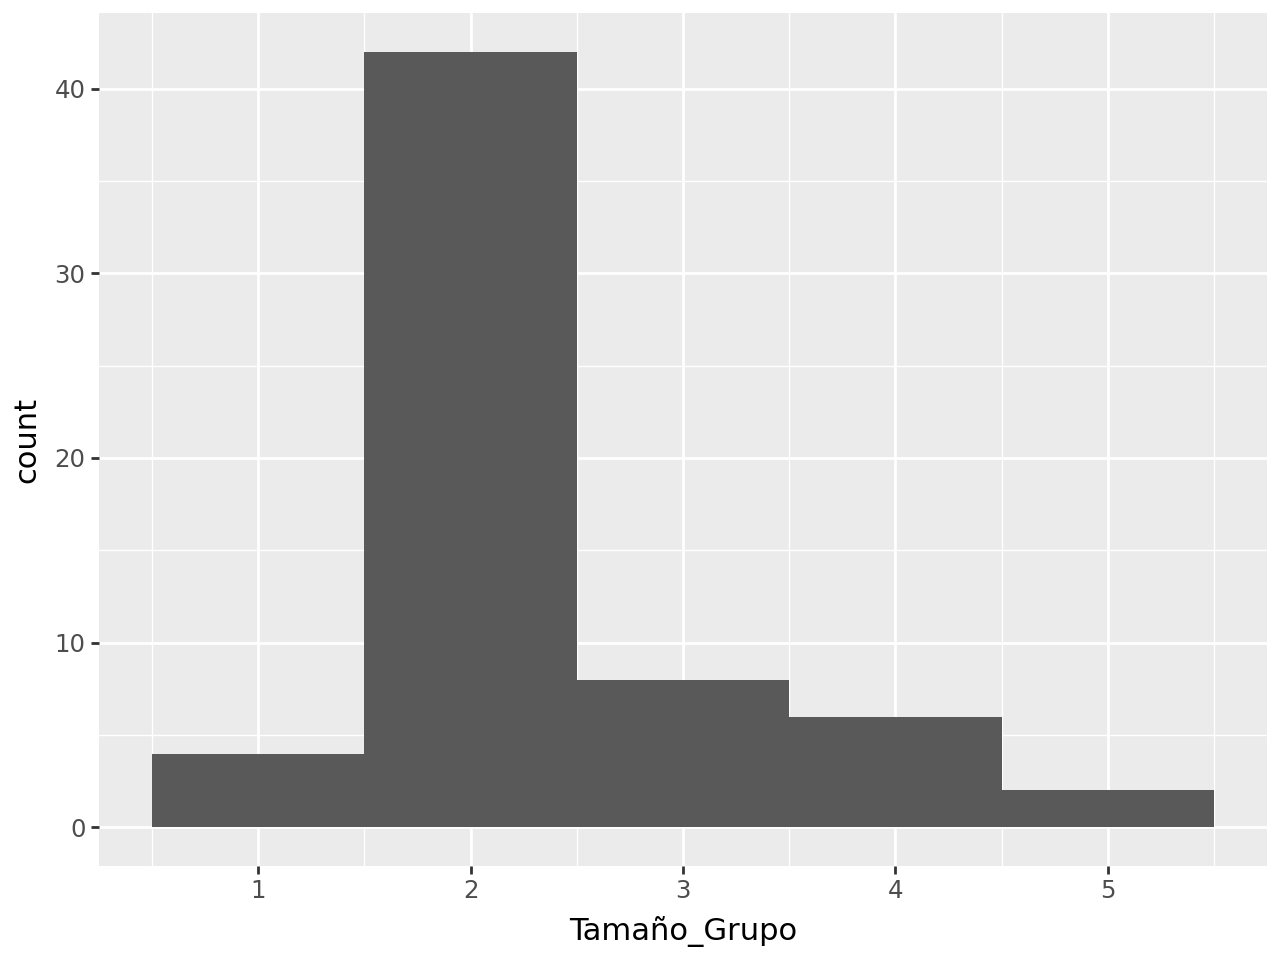

In [19]:
#tamanio de grupo de personas que llegan
ggplot(data=llegadas) + geom_histogram(mapping=aes(x="Tamaño_Grupo"),binwidth=1)

In [20]:
# numero de cada grupo que llego es decir 4 veces llegaron grupos de 1 persona (FRECUENCIA)
llegadas["Tamaño_Grupo"].value_counts()

Tamaño_Grupo
2    42
3     8
4     6
1     4
5     2
Name: count, dtype: int64

In [21]:
# FRECUENCIA RELATIVA
freq_rel = llegadas["Tamaño_Grupo"].value_counts(normalize=True)

In [22]:
freq_rel

Tamaño_Grupo
2    0.677419
3    0.129032
4    0.096774
1    0.064516
5    0.032258
Name: proportion, dtype: float64

In [23]:
########## Simulación de un día de trabajo
tiempo = 0
total_llegadas = 0

while tiempo < 600:
    total_llegadas = total_llegadas + 1
    tiempo = tiempo + np.random.exponential(scale=9.55)
    
print(total_llegadas) 

## toma las frecuencia index(etiquetas), toma el valor o tamaño de cada y una y en base a eso 
#dame o selecciona n datos (total_llegadas)de esos 
clientes = np.random.choice(freq_rel.index,total_llegadas,p=freq_rel.values)
len(clientes)

print(clientes)
df_clientes = pd.DataFrame({"total":clientes})

77
[2 5 4 4 2 1 2 2 2 3 3 4 4 2 2 4 2 2 2 2 2 2 4 2 4 2 5 2 2 3 1 4 4 2 4 2 2
 2 5 4 2 3 2 1 2 2 2 4 4 1 2 2 3 2 2 1 4 2 4 1 2 2 2 3 2 2 1 1 2 2 3 2 3 2
 2 2 2]


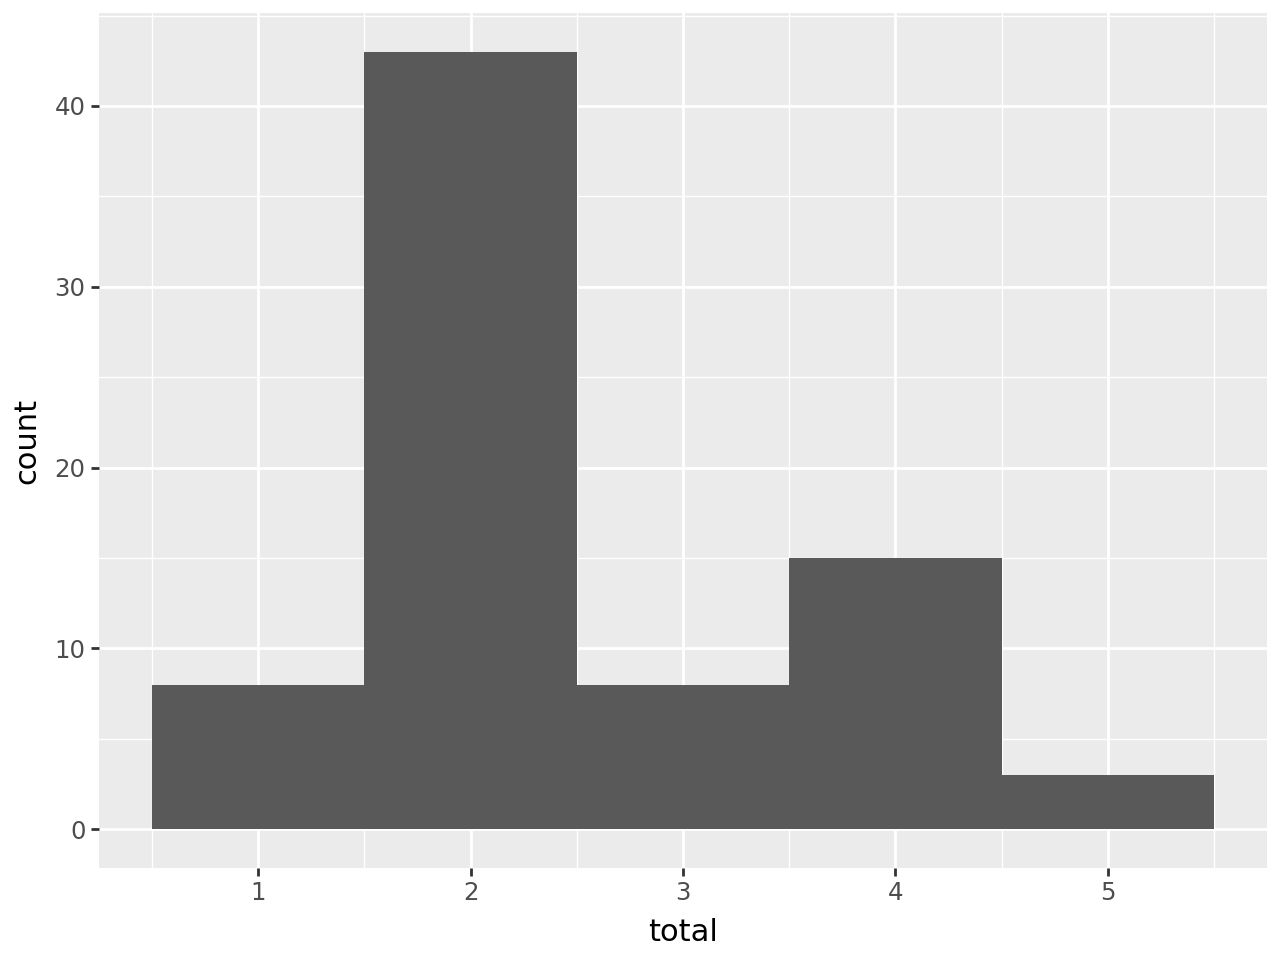

In [24]:
ggplot(data=df_clientes) + geom_histogram(mapping=aes(x="total"),binwidth=1)

In [25]:
#dado que no pasamos el parametro p a choice todo tiene la misma probabilidad 
#no es como el tamaño de grupos
#replace es para que pueda repetir el platillo o 
#pago_comida = np.random.choice(platillos["Precio"],n_cliente,replace=True).sum()

# pasamos a cada llegada y por cada cliente que pide y sumamos precio y lo guardamos en lista para saber cuanto
#pago cada mesa
pago_clientes = []

for n_cliente in clientes:
    pago_comida = np.random.choice(platillos["Precio"],n_cliente,replace=True).sum()
    pago_bebida = np.random.choice(bebidas["Precio"],n_cliente,replace=True).sum()
    pago_clientes.append(pago_comida+pago_bebida)


In [26]:
np.array(pago_clientes).size
np.array(pago_clientes).shape

(77,)

In [27]:
######### Voy a crear una función que replique la simulación de un día de trabajo

def simulacion():
    tiempo = 0
    total_llegadas = 0

    while tiempo < 600:
        total_llegadas = total_llegadas + 1
        tiempo = tiempo + np.random.exponential(scale=9.55)
        
    clientes = np.random.choice(freq_rel.index,total_llegadas,p=freq_rel.values)
    pago_clientes = []

    for n_cliente in clientes:
        pago_comida = np.random.choice(platillos["Precio"],n_cliente,replace=True).sum()
        pago_bebida = np.random.choice(bebidas["Precio"],n_cliente,replace=True).sum()
        pago_clientes.append(pago_comida+pago_bebida)
    return sum(pago_clientes)

In [29]:
#simulo 3000  dias, sumo las ganancias de cada dia y lo divido entre los dias simulados 
#por el tlc  el resultado es la media de la ganancia por dia-
dias_simulados = 3000
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

11980.915